In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

from pycocotools.coco import COCO
from skimage.transform import resize

In [ ]:
!wget http://images.cocodataset.org/zips/train2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip train2017.zip
!unzip val2017.zip
!unzip annotations_trainval2017.zip

In [ ]:
coco = COCO('./annotations/instances_train2017.json')

loading annotations into memory...
Done (t=28.91s)
creating index...
index created!


In [ ]:
category_ids = coco.getCatIds(catNms=['person'])

In [ ]:
imgIds = coco.getImgIds(catIds=category_ids);
len(imgIds)

64115

In [ ]:
img = coco.loadImgs(imgIds[5])[0]
img

{'license': 2,
 'file_name': '000000393224.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000393224.jpg',
 'height': 640,
 'width': 427,
 'date_captured': '2013-11-18 02:29:39',
 'flickr_url': 'http://farm9.staticflickr.com/8503/8356977703_647d20f05c_z.jpg',
 'id': 393224}

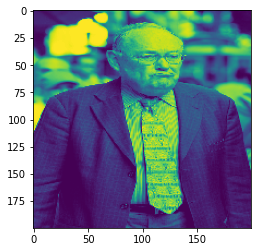

In [ ]:
image = img_to_array(load_img(f"./train2017/{img['file_name']}", target_size=(200, 200), color_mode="grayscale"))
plt.imshow(image)

In [ ]:
annIds = coco.getAnnIds(imgIds=img['id'], catIds=category_ids, iscrowd=None)
anns = coco.loadAnns(annIds)

In [ ]:
coco.annToMask(anns[i]).shape

(640, 427)

[0. 1.]
[0 1]


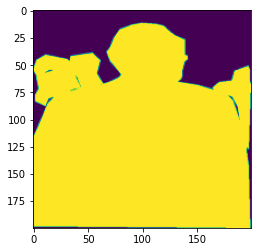

In [ ]:
#### GENERATE BINARY MASK ####

mask = np.zeros((img['height'],img['width']))
for i in range(len(anns)):
    mask = np.maximum(coco.annToMask(anns[i]), mask)
mask = mask.astype(np.uint8)
image_resized =resize(mask, (200, 200, 1))
plt.imshow(image_resized)